In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

In [2]:
from RLalgs.incremental import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q value estimate with harmonic series step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    q_h[step] = estimate(OldEstimate = q_h[step - 1], StepSize = 1 / step, Target = r)
    q_f[step] = estimate(OldEstimate = q_f[step - 1], StepSize = FixedStepSize, Target = r)
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Policy Iteration, Value Iteration, Q-Learning, and SARSA.


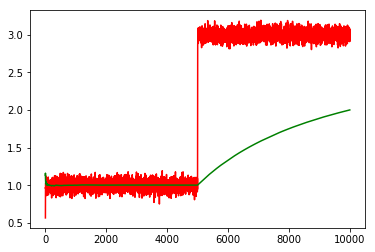

In [3]:
x = np.arange(numTimeStep)
plt.plot(x, q_f, 'r')
plt.plot(x, q_h, 'g')
plt.show()

In [4]:
from RLalgs.policy import epsilon_greedy
np.random.seed(6885)
q = np.random.normal(0, 1, size = 5)
greedy_action = epsilon_greedy(q, e = 0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, e = 0.1, seed = 6885)
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 4


In [5]:
currently_not_finished = '''
from RLalgs.policy import greedy, epsilon_greedy
np.random.seed(6885)
q_star = np.random.normal(0, 1, size = 10)
num = 1000
Na = np.zeros([3, 10])
q = np.zeros([3, 10])
for step in range(num):
    a1 = greedy(q[0])
    a2 = epsilon_greedy(q[1], e = 0.01)
    a3 = epsilon_greedy(q[2], e = 0.1)
    r1 = np.random.normal(q_star[a1], 1)
    r2 = np.random.normal(q_star[a2], 1)
    r3 = np.random.normal(q_star[a3], 1)
    Na[np.arange(3), [a1, a2, a3]] += 1
    q[a1] = estimate(OldEstimate = q_h[step - 1], StepSize = 1 / step, Target = r)
'''

In [6]:
env = gym.make('FrozenLake-v0')

In [7]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 0.99, max_iteration = 1000, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.01920812 0.02120785 0.03387831 0.01117984 0.0369987  0.
 0.08145373 0.         0.08657056 0.16024575 0.21295121 0.
 0.         0.18607148 0.40360723 0.        ]
Number of iterations to converge = 5


In [8]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 0.99, max_iteration = 1000, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.54202474 0.49880161 0.47069385 0.45684973 0.55844991 0.
 0.35834728 0.         0.59179788 0.64307921 0.61520702 0.
 0.         0.74172001 0.86283722 0.        ]
Number of iterations to converge = 276


In [9]:
#from RLalgs.ql import QLearning

In [10]:
#from RLalgs.sarsa import SARSA